In [5]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67e-11
Ms=1.989e30
AU=146.6e9 # Unidad astronómica en metros
a=17.834*AU
e=0.96714
year=86400*365.25

t_ini=0.0
t_end=75.32*year

time_array=np.linspace(t_ini,t_end,1000)


def f(E,t):    
    value = E-e*np.sin(E)-(G*Ms/a**3)**0.5 * t
    return value

def dfdE(E):
    e=0.96714
    value=1-e*np.cos(E)
    return value



In [12]:
Tol=1.0e-6
Nmax=1000


phi_array=[]
r_array=[]

for i in range(0,len(time_array)):    
    error=1.0
    iteracion=0
    p_prev=(G*Ms/a**3)**0.5 * time_array[i] # Esta es la anomalia media
    while(error>Tol):
        p=p_prev-f(p_prev,time_array[i])/dfdE(p_prev)
        error=abs(p-p_prev)
        p_prev=p
        iteracion=iteracion+1
        if(iteracion>=Nmax):
            print("El metodo no converge")
            break
        
    phi=2.0*np.arctan(((1+e)/(1-e))**0.5 * np.tan(0.5*p))
    r=a*(1-e**2)/(1+e*np.cos(phi))
    print("%.16e"%p)
    phi_array.append(phi)
    r_array.append(r)
  

0.0000000000000000e+00
1.7224965686675439e-01
2.8338094742655229e-01
3.6154080343714617e-01
4.2248869220870744e-01
4.7301950518710800e-01
5.1655204638793650e-01
5.5503789532821968e-01
5.8969681099063442e-01
6.2134363381907165e-01
6.5055092178104479e-01
6.7773721365139916e-01
7.0321831808167401e-01
7.2723879882169240e-01
7.4999219156183905e-01
7.7163448079608388e-01
7.9229337283275347e-01
8.1207485170020421e-01
8.3106792422076015e-01
8.4934812564747952e-01
8.6698015688865637e-01
8.8401990056598623e-01
9.0051598450037129e-01
9.1651100997311674e-01
9.3204252795895459e-01
9.4714382331693536e-01
9.6184455082686304e-01
9.7617125565722240e-01
9.9014780274004033e-01
1.0037957336659697e+00
1.0171345654020101e+00
1.0301820419319287e+00
1.0429543475136367e+00
1.0554662884220536e+00
1.0677314486447860e+00
1.0797623239238454e+00
1.0915704376789723e+00
1.1031664417038562e+00
1.1145602039886040e+00
1.1257608856108929e+00
1.1367770083023825e+00
1.1476165140217600e+00
1.1582868176645200e+00
1.168794853

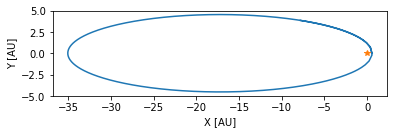

In [13]:
## grafica

x_array=[]
y_array=[]
for i in range(0,len(r_array)):
    x_array.append(r_array[i]*np.cos(phi_array[i])/AU)
    y_array.append(r_array[i]*np.sin(phi_array[i])/AU)


fig=plt.figure()
ax=plt.axes()
ax.plot(x_array,y_array)
ax.plot(0,0,'*')
ax.set_aspect('equal')
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")

plt.show()